# REF3: CSE575- Project 2: K Means Clustering

STUDENT: Francis Mendoza

ASUID: 1213055998

EMAIL: fmendoz7@asu.edu

---------------------------------------------------------------------------------------------
#### STRATEGY 1: Randomly picking initial centers


#### STRATEGY 2: First Center Random, Then Maximum Equidistance
    1. k lists for k centroids 
    2. Basically, find the largest distnace from the initial point, pick that as your centroid
    3. Continue to populate 

#### IMPORTANT POINTS
    1. Clusters need to work from 2-10
    2. Plot Objective Function value vs. Number Of Clusters, k
    3. Plot Objective Function TWICE under EACH STRATEGY (each start under different 
    initialization,  to smooth out any discrepancies from the first run)
    
#### (!!!) NEED TO PLOT THE LOSS VS K

In [93]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt, mpld3
from matplotlib import style
import pandas as pd 

style.use('ggplot')

In [94]:
Numpyfile = scipy.io.loadmat('AllSamples.mat')

# Return as numpy array
coordinatesArr = Numpyfile['AllSamples']
coordinatesArr

array([[ 2.05924902,  7.20598798],
       [ 8.87578072,  8.96092361],
       [ 8.00706441,  2.77531997],
       [ 5.01728788,  3.76311975],
       [ 6.39056222,  5.17956451],
       [ 1.95480368,  7.78421782],
       [ 4.80754093,  3.03464954],
       [ 1.3483716 ,  3.96379638],
       [ 3.04101702, -0.36138487],
       [ 8.61947945,  2.98598319],
       [ 6.11106851,  6.23497555],
       [ 3.84278989,  5.53546695],
       [ 1.69565649,  7.68082458],
       [ 4.05095774,  4.05212767],
       [ 2.48989693,  8.40047863],
       [ 6.6384501 ,  8.33574252],
       [ 6.6781262 ,  1.1080157 ],
       [ 6.2396717 ,  6.55049457],
       [ 4.72935154,  3.80839045],
       [ 3.81135136,  5.98125361],
       [ 4.90270653,  3.48642863],
       [ 7.59763505,  7.93924   ],
       [ 7.59731342,  1.16504743],
       [ 2.07898569,  7.16739313],
       [ 7.30246332,  3.16580577],
       [ 6.63352332,  0.98020705],
       [ 3.06996954,  5.97020551],
       [ 4.34489155,  3.99726667],
       [ 3.02105687,

In [95]:
class K_Means:
    # Constructor
    def __init__(self, k =3, tolerance = 0.0001, max_iterations = 500):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations
#-----------------------------------------------------------------------------------------------------------------    
    # Distance Metric we use
    def Euclidean_distance(feat_one, feat_two):
        squared_distance = 0
        
        # Lengths of two features must be the same
        for i in range(len(feat_one)):
            squared_distance += (feat_one[i] - feat_two[i])**2
        
        ed = sqrt(squared_distance)
        return ed;
    
    # Global Boolean Values To Switch Strategy 1 and Strategy 2
    strat1Bool = False
    strat2Bool = False
#-----------------------------------------------------------------------------------------------------------------    
    # (!!!) STRATEGY 1: Initialize Centroids Randomly
    def centroidInit_Strat1(self, coordinatesArr):
        self.centroids = {}
        
        #(!!!)
        objectiveDict = {}
        
        yValueObjective = 0
        
        # STEP 1: Randomize Initial Centroids
        for i in range(self.k):
            # Taking first k centroids is a valid way to randomize?
            self.centroids[i] = coordinatesArr[i]
            
        # STEP 2: Begin Iterations
        for i in range(self.max_iterations):
            
            # Dictionary to store points depending on {classification: coordinates}
            self.classes = {}
            
            #(!!!) localSum to sum all the values 
            localSum = 0 
            
            # Initialize Null Dictionary for classes and objective dictionary values
            for i in range(self.k):
                self.classes[i] = []
                objectiveDict[i] = []
            
            # STEP 3: Calculate Euclidean Distance Between Point And Cluster
            for points in coordinatesArr: 
                # 'points' have (x, y) form, calculate distance with respect to EACH centroid
                distances = [np.linalg.norm(points - self.centroids[centroid]) for centroid in self.centroids]
                
               # print("DISTANCES ARE SUCH: ", distances)
                
                # Take the MINIMUM of the distance of EVERY SINGLE POINT respective to that node
                classification = distances.index(min(distances))
                self.classes[classification].append(points)
                
                #(!!!) Update localSum
                #localSum += distances

            previous = dict(self.centroids)

            # STEP 4: Recalcualte Centroids For Next Run
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis = 0)
                
            isOptimal = True
            
            # STEP 5: Break Out Of Main Loop If Results Are Optimal
            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                
                if np.sum((curr - original_centroid)/original_centroid * 100.00) > self.tolerance:
                    isOptimal = False
                    
            if isOptimal == True:
                break
                
        # (!!!) STEP 6: Plot Objective Function For Each k
        #print(self.classes)
        totalSum = 0
        
        # Iterate through every class 
        for classification in self.classes:
            
            # (!!!) Calculate distance for all points within that classification, sum them up into one value
            temp = [np.linalg.norm(points - self.centroids[centroid]) for centroid in self.centroids]
            localSum = sum(temp)
            
            # Add localSum to totalSum
            totalSum += localSum
            
            # Append totalSum (objective value of k including all those before it)
            objectiveDict[classification].append(totalSum)
            print(objectiveDict)
            print("//////////////////////////////////////////////////")
#-----------------------------------------------------------------------------------------------------------------
    def pred(self, coordinatesArr):
        distances = [np.linalg.norm(coordinatesArr - self.centroids[centroid] for centroid in self.centroids)]
        classification = distances.index(min(distances))
        return classification
#-----------------------------------------------------------------------------------------------------------------
    def computeObjectiveFunction(self, self_classes):
        objectiveDict = {}
        totalSum = 0
        
        # Initialize empty dictionary
        for i in range(self.k):
            objectiveDict[i] = []
        
        # Iterate through every class 
        for classification in self_classes:
            
            # (!!!) Calculate distance for all points within that classification, sum them up into one value
            temp = [np.linalg.norm(points - self.centroids[centroid]) for centroid in self.centroids]
            localSum = sum(temp)
            
            # Add localSum to totalSum
            totalSum += localSum
            
            # Append totalSum (objective value of k including all those before it)
            objectiveDict[classification].append(totalSum)
            print(objectiveDict)
            print("//////////////////////////////////////////////////")
            

In [96]:
def strategy1_execute(X, a):
    # STRATEGY 1, For Loop To Iterate from 2-10 Clusters, 2 runs for the whole thing
    for i in range(2,11):
        print("Initialization #", a)
        print("STRATEGY # 1: Clusters = ", i)
        km = K_Means(i)
        km.centroidInit_Strat1(X)
        
        # GRAPH: Objective Function per y starts here
        """ <FILL IN CODE HERE> """
        
        # GRAPH: Scatterplot starts here
        colors = 10*["darkorange", "deeppink", "springgreen", "r", "g", "c", "b", "k", "m", "y"]

        for centroid in km.centroids:
            plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 130, marker = "x")

        for classification in km.classes:
            color = colors[classification]
            for xCoordinate, yCoordinate in km.classes[classification]:
                plt.scatter(xCoordinate, yCoordinate, color = color, s = 30)

        plt.show()
        print("-------------------------------------------------------------------")

Initialization # 1
STRATEGY # 1: Clusters =  2
{0: [7.064952214940677], 1: []}
//////////////////////////////////////////////////
{0: [7.064952214940677], 1: [14.129904429881353]}
//////////////////////////////////////////////////


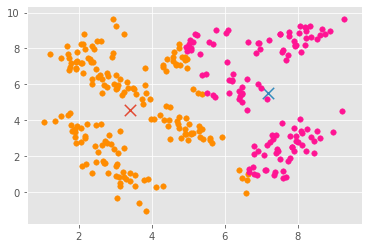

-------------------------------------------------------------------
Initialization # 1
STRATEGY # 1: Clusters =  3
{0: [12.88748941414843], 1: [], 2: []}
//////////////////////////////////////////////////
{0: [12.88748941414843], 1: [25.77497882829686], 2: []}
//////////////////////////////////////////////////
{0: [12.88748941414843], 1: [25.77497882829686], 2: [38.662468242445286]}
//////////////////////////////////////////////////


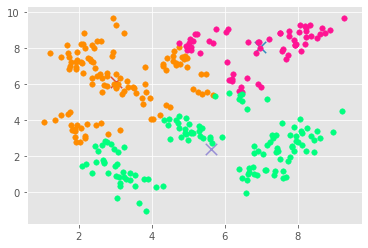

-------------------------------------------------------------------
Initialization # 1
STRATEGY # 1: Clusters =  4
{0: [15.878612024897038], 1: [], 2: [], 3: []}
//////////////////////////////////////////////////
{0: [15.878612024897038], 1: [31.757224049794075], 2: [], 3: []}
//////////////////////////////////////////////////
{0: [15.878612024897038], 1: [31.757224049794075], 2: [47.63583607469111], 3: []}
//////////////////////////////////////////////////
{0: [15.878612024897038], 1: [31.757224049794075], 2: [47.63583607469111], 3: [63.51444809958815]}
//////////////////////////////////////////////////


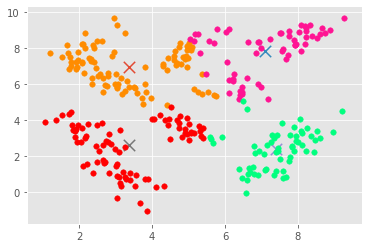

-------------------------------------------------------------------
Initialization # 1
STRATEGY # 1: Clusters =  5
{0: [21.577949413524966], 1: [], 2: [], 3: [], 4: []}
//////////////////////////////////////////////////
{0: [21.577949413524966], 1: [43.15589882704993], 2: [], 3: [], 4: []}
//////////////////////////////////////////////////
{0: [21.577949413524966], 1: [43.15589882704993], 2: [64.7338482405749], 3: [], 4: []}
//////////////////////////////////////////////////
{0: [21.577949413524966], 1: [43.15589882704993], 2: [64.7338482405749], 3: [86.31179765409986], 4: []}
//////////////////////////////////////////////////
{0: [21.577949413524966], 1: [43.15589882704993], 2: [64.7338482405749], 3: [86.31179765409986], 4: [107.88974706762482]}
//////////////////////////////////////////////////


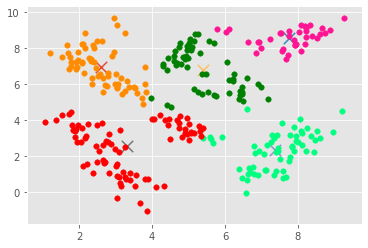

-------------------------------------------------------------------
Initialization # 1
STRATEGY # 1: Clusters =  6
{0: [26.26678015126972], 1: [], 2: [], 3: [], 4: [], 5: []}
//////////////////////////////////////////////////
{0: [26.26678015126972], 1: [52.53356030253944], 2: [], 3: [], 4: [], 5: []}
//////////////////////////////////////////////////
{0: [26.26678015126972], 1: [52.53356030253944], 2: [78.80034045380916], 3: [], 4: [], 5: []}
//////////////////////////////////////////////////
{0: [26.26678015126972], 1: [52.53356030253944], 2: [78.80034045380916], 3: [105.06712060507888], 4: [], 5: []}
//////////////////////////////////////////////////
{0: [26.26678015126972], 1: [52.53356030253944], 2: [78.80034045380916], 3: [105.06712060507888], 4: [131.3339007563486], 5: []}
//////////////////////////////////////////////////
{0: [26.26678015126972], 1: [52.53356030253944], 2: [78.80034045380916], 3: [105.06712060507888], 4: [131.3339007563486], 5: [157.60068090761834]}
///////////

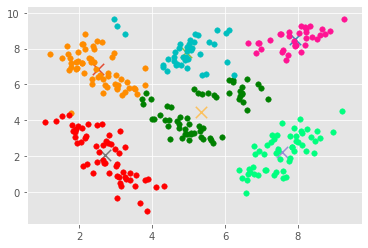

-------------------------------------------------------------------
Initialization # 1
STRATEGY # 1: Clusters =  7
{0: [29.644208120333865], 1: [], 2: [], 3: [], 4: [], 5: [], 6: []}
//////////////////////////////////////////////////
{0: [29.644208120333865], 1: [59.28841624066773], 2: [], 3: [], 4: [], 5: [], 6: []}
//////////////////////////////////////////////////
{0: [29.644208120333865], 1: [59.28841624066773], 2: [88.93262436100159], 3: [], 4: [], 5: [], 6: []}
//////////////////////////////////////////////////
{0: [29.644208120333865], 1: [59.28841624066773], 2: [88.93262436100159], 3: [118.57683248133546], 4: [], 5: [], 6: []}
//////////////////////////////////////////////////
{0: [29.644208120333865], 1: [59.28841624066773], 2: [88.93262436100159], 3: [118.57683248133546], 4: [148.22104060166933], 5: [], 6: []}
//////////////////////////////////////////////////
{0: [29.644208120333865], 1: [59.28841624066773], 2: [88.93262436100159], 3: [118.57683248133546], 4: [148.2210406016

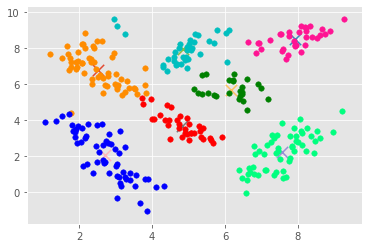

-------------------------------------------------------------------
Initialization # 1
STRATEGY # 1: Clusters =  8
{0: [35.1768950023771], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
//////////////////////////////////////////////////
{0: [35.1768950023771], 1: [70.3537900047542], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
//////////////////////////////////////////////////
{0: [35.1768950023771], 1: [70.3537900047542], 2: [105.5306850071313], 3: [], 4: [], 5: [], 6: [], 7: []}
//////////////////////////////////////////////////
{0: [35.1768950023771], 1: [70.3537900047542], 2: [105.5306850071313], 3: [140.7075800095084], 4: [], 5: [], 6: [], 7: []}
//////////////////////////////////////////////////
{0: [35.1768950023771], 1: [70.3537900047542], 2: [105.5306850071313], 3: [140.7075800095084], 4: [175.8844750118855], 5: [], 6: [], 7: []}
//////////////////////////////////////////////////
{0: [35.1768950023771], 1: [70.3537900047542], 2: [105.5306850071313], 3: [140.7075800095084], 4: [

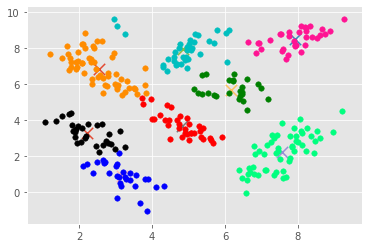

-------------------------------------------------------------------
Initialization # 1
STRATEGY # 1: Clusters =  9
{0: [41.09955081058017], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: []}
//////////////////////////////////////////////////
{0: [41.09955081058017], 1: [82.19910162116034], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: []}
//////////////////////////////////////////////////
{0: [41.09955081058017], 1: [82.19910162116034], 2: [123.2986524317405], 3: [], 4: [], 5: [], 6: [], 7: [], 8: []}
//////////////////////////////////////////////////
{0: [41.09955081058017], 1: [82.19910162116034], 2: [123.2986524317405], 3: [164.39820324232068], 4: [], 5: [], 6: [], 7: [], 8: []}
//////////////////////////////////////////////////
{0: [41.09955081058017], 1: [82.19910162116034], 2: [123.2986524317405], 3: [164.39820324232068], 4: [205.49775405290086], 5: [], 6: [], 7: [], 8: []}
//////////////////////////////////////////////////
{0: [41.09955081058017], 1: [82.19910162116034], 2: 

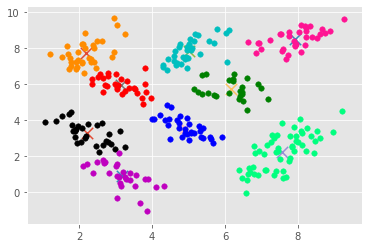

-------------------------------------------------------------------
Initialization # 1
STRATEGY # 1: Clusters =  10
{0: [42.3464507177876], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
//////////////////////////////////////////////////
{0: [42.3464507177876], 1: [84.6929014355752], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
//////////////////////////////////////////////////
{0: [42.3464507177876], 1: [84.6929014355752], 2: [127.03935215336278], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
//////////////////////////////////////////////////
{0: [42.3464507177876], 1: [84.6929014355752], 2: [127.03935215336278], 3: [169.3858028711504], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
//////////////////////////////////////////////////
{0: [42.3464507177876], 1: [84.6929014355752], 2: [127.03935215336278], 3: [169.3858028711504], 4: [211.732253588938], 5: [], 6: [], 7: [], 8: [], 9: []}
//////////////////////////////////////////////////
{0: [42.3464507177876], 1:

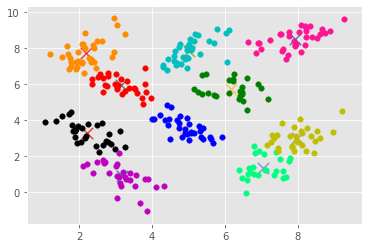

-------------------------------------------------------------------
Initialization # 2
STRATEGY # 1: Clusters =  2
{0: [7.064952214940677], 1: []}
//////////////////////////////////////////////////
{0: [7.064952214940677], 1: [14.129904429881353]}
//////////////////////////////////////////////////


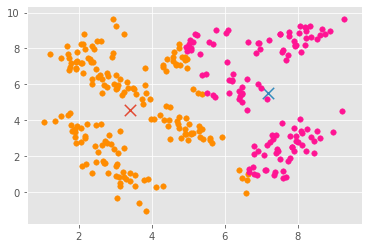

-------------------------------------------------------------------
Initialization # 2
STRATEGY # 1: Clusters =  3
{0: [12.88748941414843], 1: [], 2: []}
//////////////////////////////////////////////////
{0: [12.88748941414843], 1: [25.77497882829686], 2: []}
//////////////////////////////////////////////////
{0: [12.88748941414843], 1: [25.77497882829686], 2: [38.662468242445286]}
//////////////////////////////////////////////////


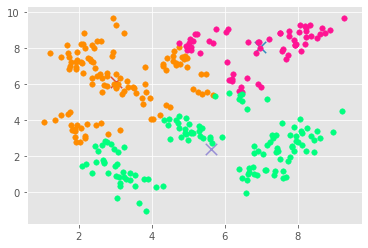

-------------------------------------------------------------------
Initialization # 2
STRATEGY # 1: Clusters =  4
{0: [15.878612024897038], 1: [], 2: [], 3: []}
//////////////////////////////////////////////////
{0: [15.878612024897038], 1: [31.757224049794075], 2: [], 3: []}
//////////////////////////////////////////////////
{0: [15.878612024897038], 1: [31.757224049794075], 2: [47.63583607469111], 3: []}
//////////////////////////////////////////////////
{0: [15.878612024897038], 1: [31.757224049794075], 2: [47.63583607469111], 3: [63.51444809958815]}
//////////////////////////////////////////////////


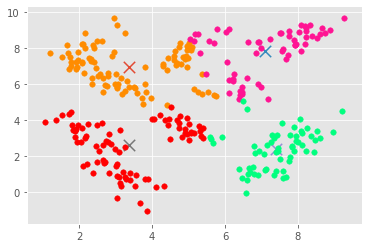

-------------------------------------------------------------------
Initialization # 2
STRATEGY # 1: Clusters =  5
{0: [21.577949413524966], 1: [], 2: [], 3: [], 4: []}
//////////////////////////////////////////////////
{0: [21.577949413524966], 1: [43.15589882704993], 2: [], 3: [], 4: []}
//////////////////////////////////////////////////
{0: [21.577949413524966], 1: [43.15589882704993], 2: [64.7338482405749], 3: [], 4: []}
//////////////////////////////////////////////////
{0: [21.577949413524966], 1: [43.15589882704993], 2: [64.7338482405749], 3: [86.31179765409986], 4: []}
//////////////////////////////////////////////////
{0: [21.577949413524966], 1: [43.15589882704993], 2: [64.7338482405749], 3: [86.31179765409986], 4: [107.88974706762482]}
//////////////////////////////////////////////////


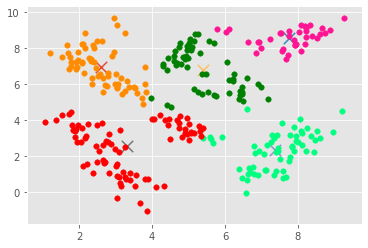

-------------------------------------------------------------------
Initialization # 2
STRATEGY # 1: Clusters =  6
{0: [26.26678015126972], 1: [], 2: [], 3: [], 4: [], 5: []}
//////////////////////////////////////////////////
{0: [26.26678015126972], 1: [52.53356030253944], 2: [], 3: [], 4: [], 5: []}
//////////////////////////////////////////////////
{0: [26.26678015126972], 1: [52.53356030253944], 2: [78.80034045380916], 3: [], 4: [], 5: []}
//////////////////////////////////////////////////
{0: [26.26678015126972], 1: [52.53356030253944], 2: [78.80034045380916], 3: [105.06712060507888], 4: [], 5: []}
//////////////////////////////////////////////////
{0: [26.26678015126972], 1: [52.53356030253944], 2: [78.80034045380916], 3: [105.06712060507888], 4: [131.3339007563486], 5: []}
//////////////////////////////////////////////////
{0: [26.26678015126972], 1: [52.53356030253944], 2: [78.80034045380916], 3: [105.06712060507888], 4: [131.3339007563486], 5: [157.60068090761834]}
///////////

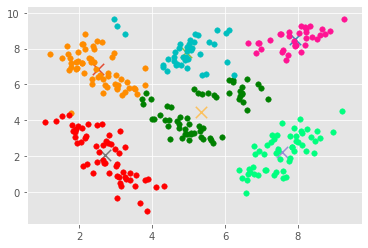

-------------------------------------------------------------------
Initialization # 2
STRATEGY # 1: Clusters =  7
{0: [29.644208120333865], 1: [], 2: [], 3: [], 4: [], 5: [], 6: []}
//////////////////////////////////////////////////
{0: [29.644208120333865], 1: [59.28841624066773], 2: [], 3: [], 4: [], 5: [], 6: []}
//////////////////////////////////////////////////
{0: [29.644208120333865], 1: [59.28841624066773], 2: [88.93262436100159], 3: [], 4: [], 5: [], 6: []}
//////////////////////////////////////////////////
{0: [29.644208120333865], 1: [59.28841624066773], 2: [88.93262436100159], 3: [118.57683248133546], 4: [], 5: [], 6: []}
//////////////////////////////////////////////////
{0: [29.644208120333865], 1: [59.28841624066773], 2: [88.93262436100159], 3: [118.57683248133546], 4: [148.22104060166933], 5: [], 6: []}
//////////////////////////////////////////////////
{0: [29.644208120333865], 1: [59.28841624066773], 2: [88.93262436100159], 3: [118.57683248133546], 4: [148.2210406016

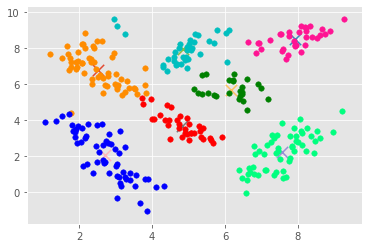

-------------------------------------------------------------------
Initialization # 2
STRATEGY # 1: Clusters =  8
{0: [35.1768950023771], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
//////////////////////////////////////////////////
{0: [35.1768950023771], 1: [70.3537900047542], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
//////////////////////////////////////////////////
{0: [35.1768950023771], 1: [70.3537900047542], 2: [105.5306850071313], 3: [], 4: [], 5: [], 6: [], 7: []}
//////////////////////////////////////////////////
{0: [35.1768950023771], 1: [70.3537900047542], 2: [105.5306850071313], 3: [140.7075800095084], 4: [], 5: [], 6: [], 7: []}
//////////////////////////////////////////////////
{0: [35.1768950023771], 1: [70.3537900047542], 2: [105.5306850071313], 3: [140.7075800095084], 4: [175.8844750118855], 5: [], 6: [], 7: []}
//////////////////////////////////////////////////
{0: [35.1768950023771], 1: [70.3537900047542], 2: [105.5306850071313], 3: [140.7075800095084], 4: [

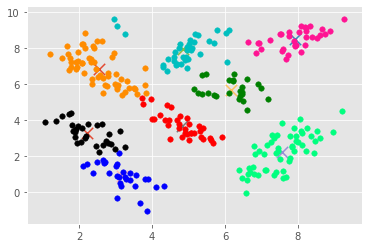

-------------------------------------------------------------------
Initialization # 2
STRATEGY # 1: Clusters =  9
{0: [41.09955081058017], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: []}
//////////////////////////////////////////////////
{0: [41.09955081058017], 1: [82.19910162116034], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: []}
//////////////////////////////////////////////////
{0: [41.09955081058017], 1: [82.19910162116034], 2: [123.2986524317405], 3: [], 4: [], 5: [], 6: [], 7: [], 8: []}
//////////////////////////////////////////////////
{0: [41.09955081058017], 1: [82.19910162116034], 2: [123.2986524317405], 3: [164.39820324232068], 4: [], 5: [], 6: [], 7: [], 8: []}
//////////////////////////////////////////////////
{0: [41.09955081058017], 1: [82.19910162116034], 2: [123.2986524317405], 3: [164.39820324232068], 4: [205.49775405290086], 5: [], 6: [], 7: [], 8: []}
//////////////////////////////////////////////////
{0: [41.09955081058017], 1: [82.19910162116034], 2: 

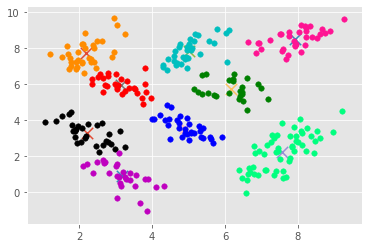

-------------------------------------------------------------------
Initialization # 2
STRATEGY # 1: Clusters =  10
{0: [42.3464507177876], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
//////////////////////////////////////////////////
{0: [42.3464507177876], 1: [84.6929014355752], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
//////////////////////////////////////////////////
{0: [42.3464507177876], 1: [84.6929014355752], 2: [127.03935215336278], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
//////////////////////////////////////////////////
{0: [42.3464507177876], 1: [84.6929014355752], 2: [127.03935215336278], 3: [169.3858028711504], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
//////////////////////////////////////////////////
{0: [42.3464507177876], 1: [84.6929014355752], 2: [127.03935215336278], 3: [169.3858028711504], 4: [211.732253588938], 5: [], 6: [], 7: [], 8: [], 9: []}
//////////////////////////////////////////////////
{0: [42.3464507177876], 1:

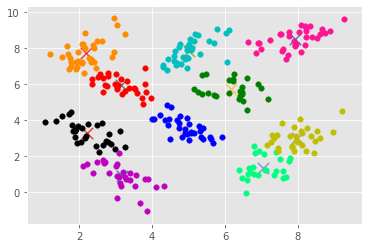

-------------------------------------------------------------------


In [97]:
def main():
    X = coordinatesArr

    # STRATEGY 1, For Loop To Iterate from 2-10 Clusters, 2 runs for the whole thing
    for a in range(1,3):
        strategy1_execute(X, a)
        print("===================================================================")
    
    # STRATEGY 2, For Loop To Iterate from 2-10 Clusters, 2 runs for the whole thing
    """ <FILL IN CODE HERE> """

if __name__ == "__main__":
    main()